# Rain Prediction in Australia

### Introduction:
* In this article, I will be implementing a predictive model on Rain Dataset to predict whether or not it will rain tomorrow in Australia. The Dataset contains about 10 years of daily weather observations of different locations in Australia. By the end of this article, you will be able to build a predictive model.
#### Dataset Link :- https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

<img src = "Australia.jpg" style = "width:300px;height:200px"/>


### Steps:
* Problem Statement
* Import Libraries
* Import Dataset
* Data Exploration 
* Finding categorical and Numerical features in Dataset
* Cardinality check for categorical features
* Handling Missing values
* Outlier detection and treatment
* Exploratory Data Analysis
* Encoding categorical features
* Correlation
* Feature Importance
* Splitting Data into Training and Testing sets
* Feature Scaling
* Model Building and Evaluation
* Results and Conclusion




###  Problem Statement: 
Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow in Australia.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

###  Import Dataset

In [2]:
rain = pd.read_csv('weatherAUS.csv')
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


###  Data Exploration

In [3]:
# Check shape of dataset
rain.shape

(145460, 23)

In rain dataset we can see 145460 rows and 23 columns. 

In [4]:
# check columns names
rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
# Check basic information of dataset
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# Check statistical summary of dataset
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
# Check missing values 
rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Here we can see except Date and Location column every column has null values are present

In [8]:
# Check unique values 
rain.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

###  Finding categorical and Numerical features in Dataset
* **Categorical features in Dataset:**

In [9]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features : {}". format(len(categorical_features)))
print("Categorical Features: ", categorical_features)

Number of Categorical Features : 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


* **Numerical Features in Dataset:**



In [10]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


* **Cardinality check for Categorical features:**

In [11]:
for each_feature in categorical_features:
   unique_values = len(rain[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.

* **Feature Engineering of Date column to decrease high cardinality:**

In [12]:
rain['Date'] = pd.to_datetime(rain['Date'])
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

In [13]:
# Drop Date column:
rain.drop('Date', axis = 1, inplace = True)
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [14]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']

rain[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

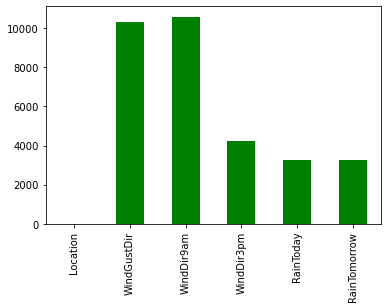

In [15]:
#check null values by barplot
rain[categorical_features].isnull().sum().plot(kind= "bar", color= "g")
plt.show()

* **Imputing the missing values in categorical features using the most frequent value which is mode:**

In [16]:
categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [17]:
rain[categorical_features_with_null].isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

* **Handling Missing values in Numerical features:**

In [18]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
rain[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

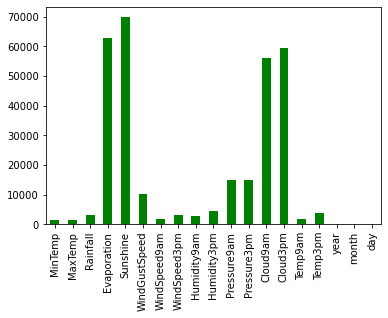

In [19]:
#check null values by barplot
rain[numerical_features].isnull().sum().plot(kind= "bar", color= "g")
plt.show()

Missing values in Numerical Features can be imputed using Mean and Median. Mean is sensitive to outliers and median is immune to outliers. If you want to impute the missing values with mean values, then outliers in numerical features need to be addressed properly.

### Outliers detection and treatment:

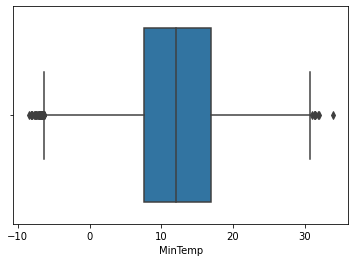

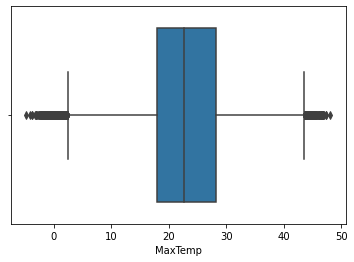

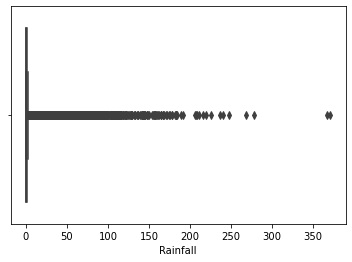

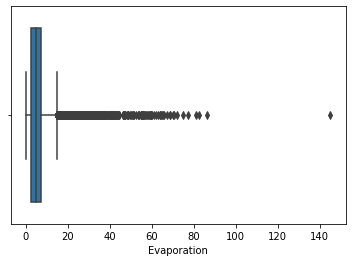

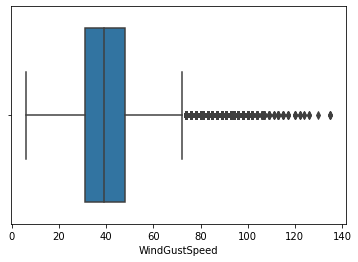

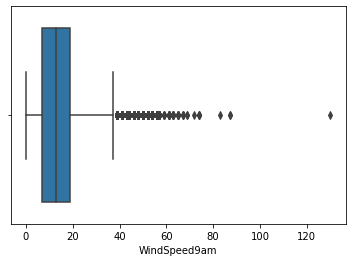

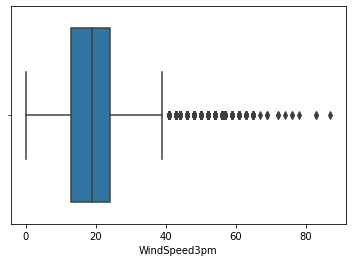

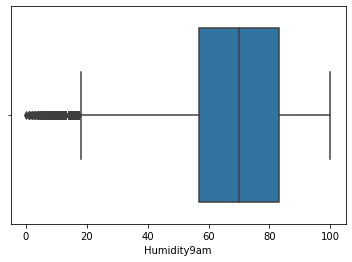

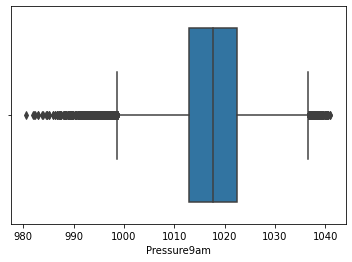

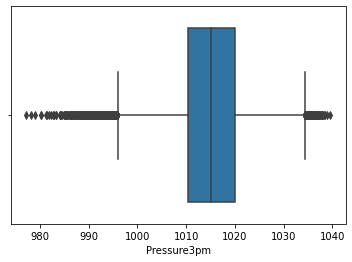

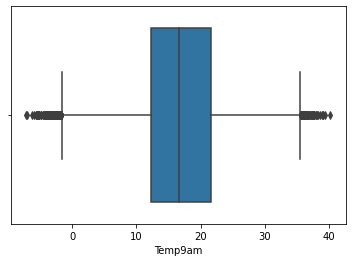

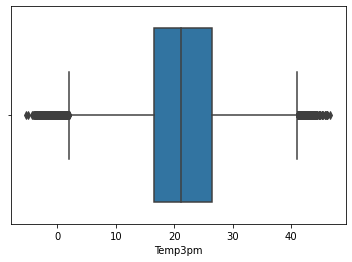

In [20]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    sns.boxplot(rain[feature])
    plt.show()

In [21]:
# Outlier Treatment to remove outliers from Numerical Features:

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

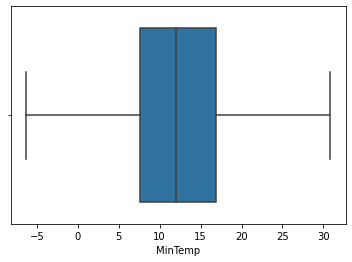

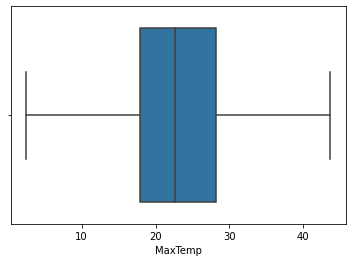

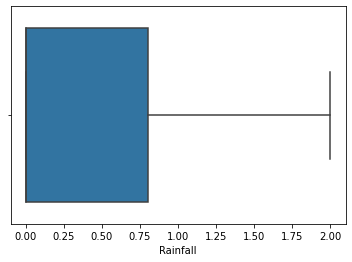

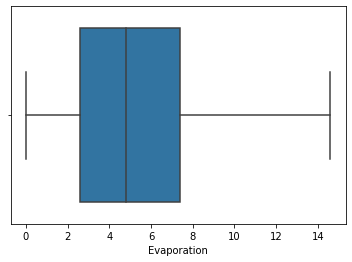

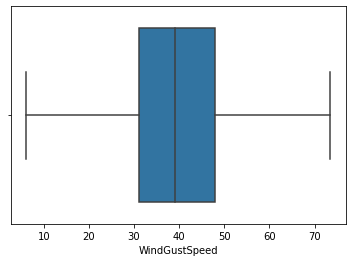

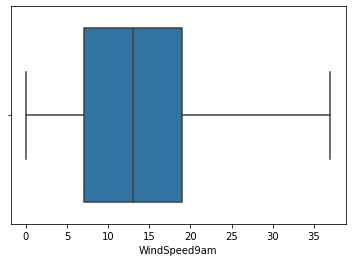

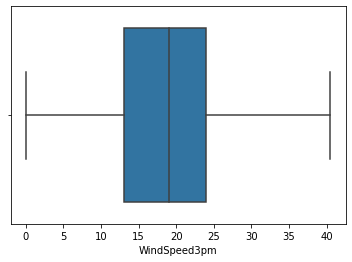

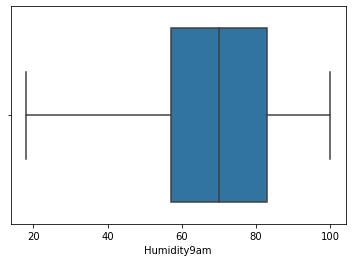

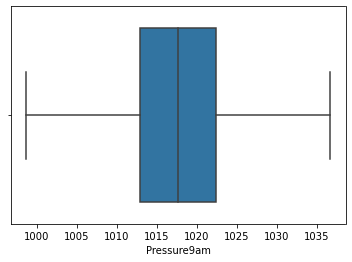

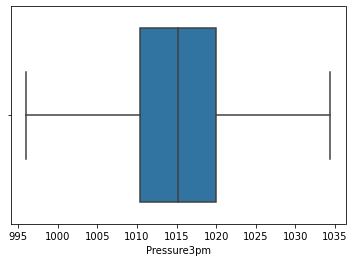

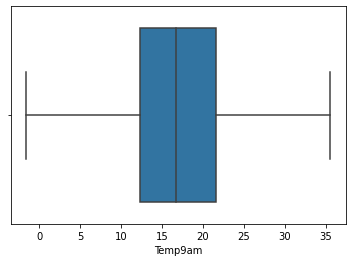

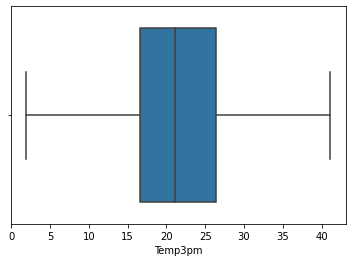

In [22]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    sns.boxplot(rain[feature])
    plt.show()

Now, numerical features are free from outliers. Let’s Impute missing values in numerical features using mean.

In [23]:
numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

In [24]:
rain[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
month            0
day              0
dtype: int64

Now No Null values present.

It’s time to do some analysis on each feature to understand about data and get some insights.

### Exploratory Data Analysis:

### 1. Univariate Analysis:

**a) Exploring target variable:**

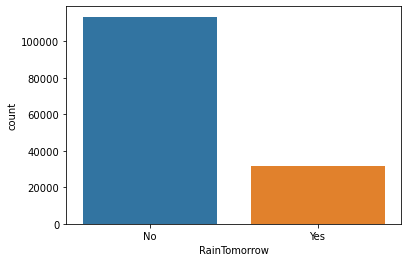

In [25]:
sns.countplot(rain["RainTomorrow"])
plt.show()

Looks like the Target variable is imbalanced. ‘No’ values is more than 'Yes' values.
As this data is released by the meteorological department of Australia, it doesn’t make any sense when we try to balance the target variable, because the truthfulness of data might decrease. So, let me keep it as it is.

### 2. Bi-variate Analysis:

**a) Sunshine vs Rainfall:**

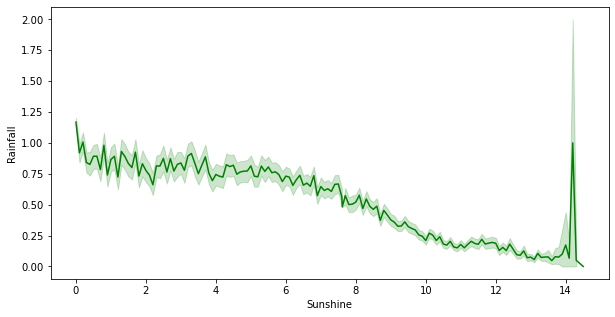

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='green')
plt.show()

Here we can see the **Sunshine** is inversely proportional to **Rainfall**

**b) Sunshine vs Evaporation:**

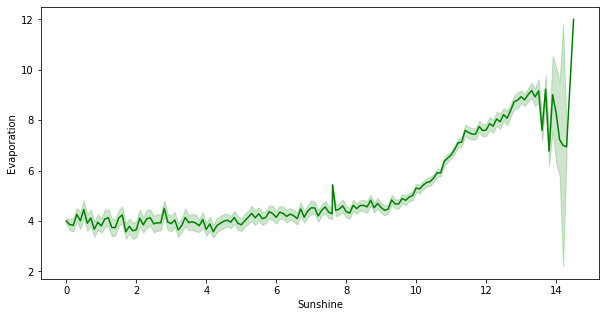

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(data=rain,x='Sunshine',y='Evaporation',color='g')
plt.show()

Here we can see the **Sunshine** feature is proportional to the **Evaporation** feature.

###  Encoding of Categorical Features:
There are many feature encoding techniques like One code encoding, label encoding. But in this particular blog, I will be using replace() function to encode categorical data to numerical data.

In [28]:
def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(rain[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict




rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

rain['Location'].replace(encode_data('Location'), inplace = True)

In [29]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


In [30]:
rain.dtypes

Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
year               int64
month              int64
day                int64
dtype: object

### Correlation: 

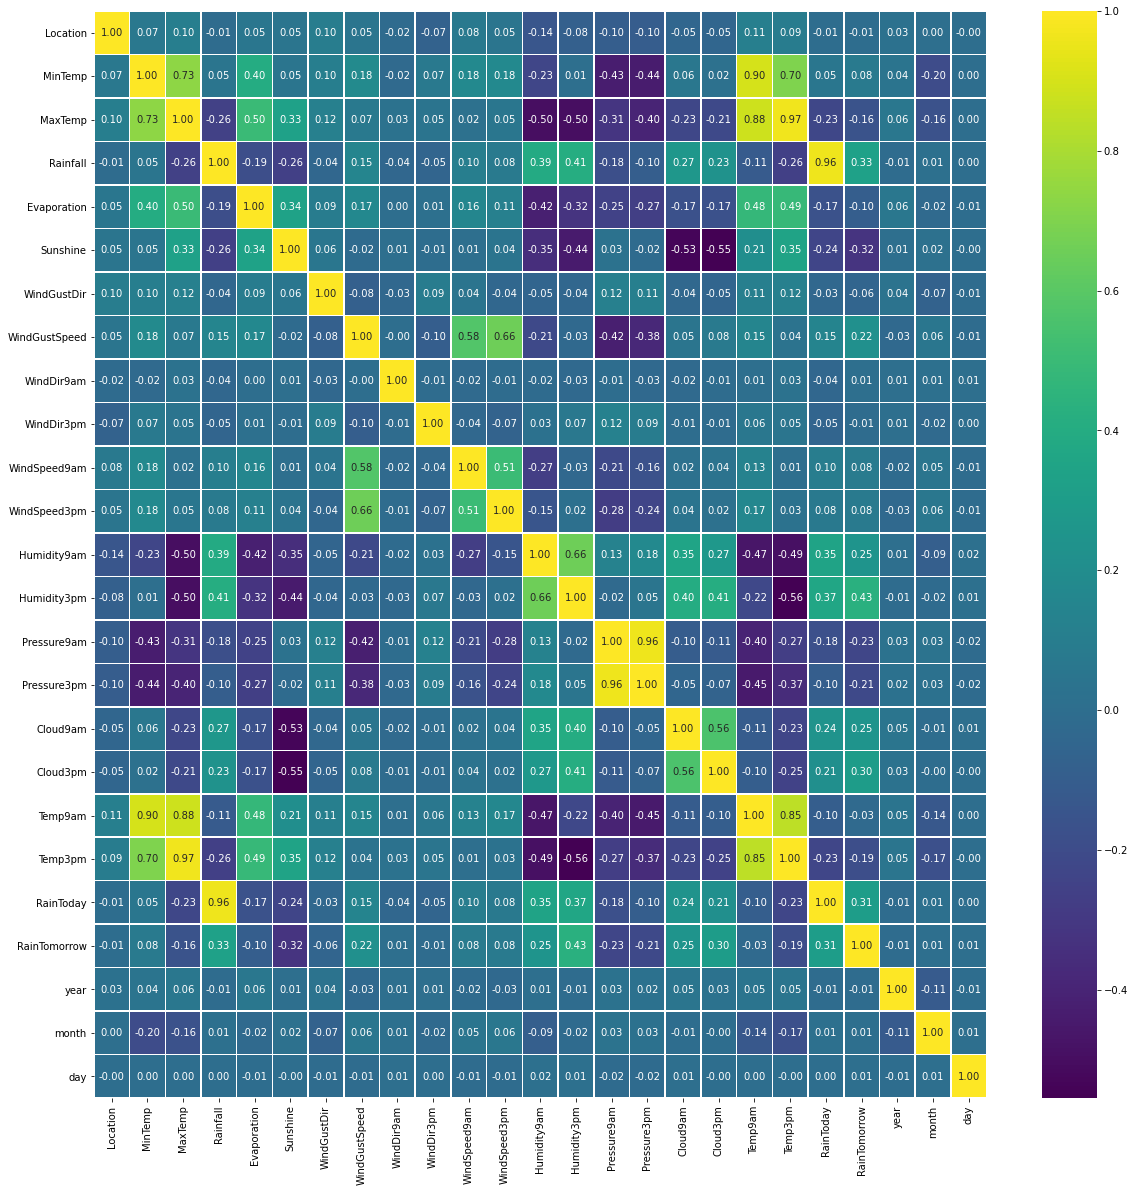

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(), annot= True, linewidths=0.5, fmt=".2f", cmap = 'viridis')
plt.show()

### Splitting data into Independent Features and Dependent Features:

For feature importance and feature scaling, we need to split data into independent and dependent features.

In [32]:
X = rain.drop(['RainTomorrow'],axis=1)
y = rain['RainTomorrow']

### Feature Importance:

We’ll be using ExtraTreesRegressor class for Feature Importance. This class implements a meta estimator that fits a number of randomized decision trees on various samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


In [33]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X, y)
etr.feature_importances_

array([0.03460236, 0.02985455, 0.02870472, 0.0385799 , 0.02332894,
       0.04316197, 0.02998096, 0.05701118, 0.03043323, 0.03156911,
       0.03095362, 0.0323024 , 0.03678496, 0.20617426, 0.03560228,
       0.05014763, 0.0239551 , 0.03442218, 0.02821958, 0.02851636,
       0.05201079, 0.03073105, 0.03037642, 0.03257646])

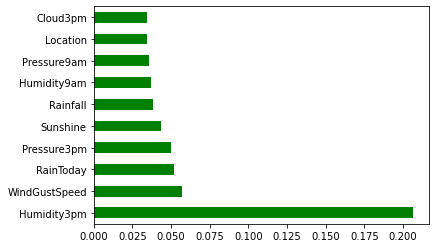

In [34]:
# Let’s visualize feature importance values:
feature_imp = pd.Series(etr.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh', color = "g")
plt.show()

### Splitting Data into training and testing set:

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [36]:
print(X_train.shape)
print(X_test.shape)

(116368, 24)
(29092, 24)


### Feature Scaling:

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

##  Model Building & Evaluation
### Import Models

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


### Logistic Regression

In [39]:
lr= LogisticRegression()

lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")

y_pred =  lr.predict(X_test)

# confussion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:- ")
print(cm)

lr_accuracy = accuracy_score(y_test,y_pred)

print("accuracy is:- ", lr_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Logistic regression successfully implemented
Confusion Matrix:- 
[[21536  1190]
 [ 3334  3032]]
accuracy is:-  84.44933315000688
Classification Report:-
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22726
           1       0.72      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



### Decision tree

In [40]:

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")

y_pred = dtree.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
dtree_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", dtree_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[19589  3137]
 [ 2942  3424]]
accuracy:-  79.10422109170906
Classification Report:-
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     22726
           1       0.52      0.54      0.53      6366

    accuracy                           0.79     29092
   macro avg       0.70      0.70      0.70     29092
weighted avg       0.79      0.79      0.79     29092



### Random Forest Classifier

In [41]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")

y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
rfc_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", rfc_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[21765   961]
 [ 3242  3124]]
accuracy:-  85.55272927265227
Classification Report:-
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22726
           1       0.76      0.49      0.60      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.72      0.75     29092
weighted avg       0.85      0.86      0.84     29092



### K Nearest Neighbors Classifier

In [42]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

print("K-Nearest Neighbors classifier is successfully implemented")

y_pred = knn.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
knn_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", knn_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[21423  1303]
 [ 3450  2916]]
accuracy:-  83.66217516843119
Classification Report:-
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22726
           1       0.69      0.46      0.55      6366

    accuracy                           0.84     29092
   macro avg       0.78      0.70      0.73     29092
weighted avg       0.82      0.84      0.82     29092



### Ada Boost Classifier

In [43]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

print("Ada Boost Classifier is successfully implemented")

y_pred = adb.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
adb_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", adb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Ada Boost Classifier is successfully implemented
Confusion Matrix:- 
[[21493  1233]
 [ 3330  3036]]
accuracy:-  84.3152756771621
Classification Report:-
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22726
           1       0.71      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



### Naive Bayes

In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
gnb_accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", gnb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Naive Bayes is successfully implemented
Confusion Matrix:- 
[[18780  2284]
 [ 3946  4082]]
accuracy:-  78.58517805582291
Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     22726
           1       0.51      0.64      0.57      6366

    accuracy                           0.79     29092
   macro avg       0.70      0.73      0.71     29092
weighted avg       0.81      0.79      0.79     29092



### XG Boost Classifier

In [45]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
print("XG Boost Classifier is successfully implemented")

y_pred = xgb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
xgb_accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", xgb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


[15:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier is successfully implemented
Confusion Matrix:- 
[[21571  2985]
 [ 1155  3381]]
accuracy:-  85.76928365186306
Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22726
           1       0.75      0.53      0.62      6366

    accuracy                           0.86     29092
   macro avg       0.81      0.74      0.77     29092
weighted avg       0.85      0.86      0.85     29092



### Analysing different models

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN Classifier', 'Ada Boost Classifier', 'Naive Bayes','XG Boost Classifier'],
    'Accuracy Score': [lr_accuracy, dtree_accuracy, rfc_accuracy,knn_accuracy, adb_accuracy, gnb_accuracy, xgb_accuracy]})

models.sort_values(['Accuracy Score'], ascending=[False]).style.background_gradient(cmap='Oranges')

,Model,Accuracy Score
6,XG Boost Classifier,0.857693
2,Random Forest,0.855527
0,Logistic Regression,0.844493
4,Ada Boost Classifier,0.843153
3,KNN Classifier,0.836622
1,Decision Tree,0.791042
5,Naive Bayes,0.785852


### Receiver operating characteristic(ROC) curve:


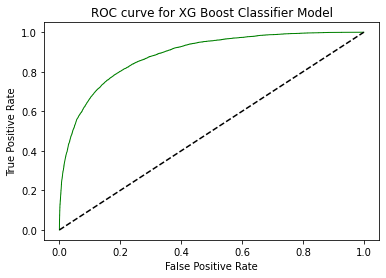

In [47]:
y_pred_logreg_proba = xgb.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for XG Boost Classifier Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

**Cross-Validation:**



In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

[15:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

The mean accuracy score of cross-validation is almost the same as the original model accuracy score which is **0.8576**. So, the accuracy of the model may not be improved using Cross-validation.

### Results and Conclusion:

* The XG Boost Classifier Model accuracy score is **0.8576**. The model does a very good job of predicting.
* The model shows no sign of Underfitting or Overfitting. This means the model generalizing well for unseen data.
* The mean accuracy score of cross-validation is almost the same as the original model accuracy score. So, the accuracy of the model may not be improved using Cross-validation.
